# **Importación de Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D



In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# **Carga de Datos**

In [4]:
data = pd.read_csv('train.csv')


In [5]:
data_test = pd.read_csv('test.csv')


# **Preprocesamiento de Datos**

In [6]:
# Asegurarse de que las columnas tengan el tipo de datos correcto

# Convertir las columnas numéricas a tipo float64
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # 'age' como numérica
data['trestbps'] = pd.to_numeric(data['trestbps'], errors='coerce')  # 'trestbps' como numérica
data['chol'] = pd.to_numeric(data['chol'], errors='coerce')  # 'chol' como numérica
data['restecg'] = pd.to_numeric(data['restecg'], errors='coerce')  # 'restecg' como numérica
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')  # 'thalach' como numérica
data['oldpeak'] = pd.to_numeric(data['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda
data['sex'] = data['sex'].astype('object')  # 'sex' como categórica
data['cp'] = data['cp'].astype('object')  # 'cp' como categórica
data['fbs'] = data['fbs'].astype('object')  # 'fbs' como categórica
data['exang'] = data['exang'].astype('object')  # 'exang' como categórica
data['slope'] = data['slope'].astype('object')  # 'slope' como categórica
data['ca'] = data['ca'].astype('object')  # 'ca' como categórica
data['thal'] = data['thal'].astype('object')  # 'thal' como categórica

In [7]:
# Convertir las columnas numéricas a tipo float64 en data_test
data_test['age'] = pd.to_numeric(data_test['age'], errors='coerce')  # 'age' como numérica
data_test['trestbps'] = pd.to_numeric(data_test['trestbps'], errors='coerce')  # 'trestbps' como numérica
data_test['chol'] = pd.to_numeric(data_test['chol'], errors='coerce')  # 'chol' como numérica
data_test['restecg'] = pd.to_numeric(data_test['restecg'], errors='coerce')  # 'restecg' como numérica
data_test['thalach'] = pd.to_numeric(data_test['thalach'], errors='coerce')  # 'thalach' como numérica
data_test['oldpeak'] = pd.to_numeric(data_test['oldpeak'], errors='coerce')  # 'oldpeak' como numérica

# Convertir las columnas categóricas (objetos) a tipo 'category' o 'int' donde corresponda en data_test
data_test['sex'] = data_test['sex'].astype('category')  # 'sex' como categórica
data_test['cp'] = data_test['cp'].astype('category')  # 'cp' como categórica
data_test['fbs'] = data_test['fbs'].astype('category')  # 'fbs' como categórica
data_test['exang'] = data_test['exang'].astype('category')  # 'exang' como categórica
data_test['slope'] = data_test['slope'].astype('category')  # 'slope' como categórica
data_test['ca'] = data_test['ca'].astype('category')  # 'ca' como categórica
data_test['thal'] = data_test['thal'].astype('category')  # 'thal' como categórica

In [8]:
# Primero, reemplazamos los valores problemáticos ('?', '-9', '0') por NaN en las columnas numéricas
columns_to_check = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
data[columns_to_check] = data[columns_to_check].replace(['?','NaN'], np.nan)
data[columns_to_check] = data[columns_to_check].replace(-9.0, -1.0)
data[columns_to_check] = data[columns_to_check].replace(0, -1.0)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Verificamos los primeros registros para asegurarnos de que el reemplazo se haya hecho correctamente
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach exang  oldpeak  \
0  51.0  1.0  1.0     125.0  213.0  0.0      2.0    125.0   1.0      1.4   
1  54.0  1.0  3.0     120.0  237.0  0.0      0.0    150.0   1.0      1.5   
2  63.0  1.0  4.0     140.0   -1.0    ?      2.0    149.0     0      2.0   
3  52.0  0.0  2.0     140.0   -1.0  0.0      0.0    140.0   0.0     -1.0   
4  55.0  1.0  4.0     140.0  217.0  0.0      0.0    111.0   1.0      5.6   

  slope    ca  thal  label  
0   1.0   1.0   3.0      0  
1  -9.0  -9.0   7.0      2  
2     1     ?     ?      2  
3  -9.0  -9.0  -9.0      0  
4   3.0   0.0   7.0      3  


In [9]:
columns_to_check = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
data_test[columns_to_check] = data_test[columns_to_check].replace(['?','NaN'], np.nan)
data_test[columns_to_check] = data_test[columns_to_check].replace(-9.0, -1.0)
numerical_columns = data_test.select_dtypes(include=['float64', 'int64']).columns
data_test[numerical_columns] = data_test[numerical_columns].apply(lambda x: x.fillna(x.mean()))


print(data_test.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach exang  oldpeak  \
0  57.0  1.0  4.0     156.0  173.0    0      2.0    119.0     1      3.0   
1  52.0  1.0  2.0     160.0  196.0  0.0      0.0    165.0   0.0      0.0   
2  48.0  1.0  2.0     100.0   -1.0  0.0      0.0    100.0   0.0      0.0   
3  62.0  1.0  4.0     115.0    0.0    ?      0.0    128.0     1      2.5   
4  51.0  1.0  3.0     110.0  175.0  0.0      0.0    123.0   0.0      0.6   

  slope    ca  thal  
0     3     ?     ?  
1  -9.0  -9.0  -9.0  
2  -9.0  -9.0  -9.0  
3     3     ?     ?  
4   1.0   0.0   3.0  


#Label Encoding

In [10]:
# 4. Frecuencia cardíaca en reposo (thalach)
bins_thalach = [0, 60, 100, 200]  # No se cambia mucho
labels_thalach = [0, 1, 2]  # Etiquetas numéricas: 0 = Baja, 1 = Normal, 2 = Alta

# Función para categorizar la frecuencia cardíaca en reposo
def categorize_thalach(x):
    if x == -1:
        return -1  # Asignar -1 para los valores inválidos
    else:
        return pd.cut([x], bins=bins_thalach, labels=labels_thalach, right=True)[0]

# Reemplazar la columna 'thalach' con las categorías numéricas
data['thalach'] = data['thalach'].apply(categorize_thalach)
data_test['thalach'] = data_test['thalach'].apply(categorize_thalach)


In [11]:
data.replace('NaN', np.nan, inplace=True)

# Reemplazar los valores problemáticos ('?') por NaN en las columnas categóricas
columns_to_check_categor = ['sex', 'ca', 'fbs', 'exang', 'slope', 'thal', 'cp', 'restecg']
data[columns_to_check_categor] = data[columns_to_check_categor].replace(['?'], np.nan)
data[columns_to_check_categor] = data[columns_to_check_categor].replace("-9.0", "-1.0")

# Asegurarse de que las columnas categóricas sean de tipo 'category'
data[columns_to_check_categor] = data[columns_to_check_categor].astype('category')

# Agrupar por 'label' y reemplazar los NaN en las columnas categóricas por la moda de cada grupo
data[columns_to_check_categor] = data[columns_to_check_categor].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Verificar los primeros registros para asegurarnos de que los NaN se hayan reemplazado con la moda
print(data[columns_to_check_categor].head())

   sex    ca  fbs exang slope  thal   cp restecg
0  1.0   1.0  0.0   1.0   1.0   3.0  1.0     2.0
1  1.0  -1.0  0.0   1.0  -1.0   7.0  3.0     0.0
2  1.0  -1.0  0.0     0     1  -1.0  4.0     2.0
3  0.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
4  1.0   0.0  0.0   1.0   3.0   7.0  4.0     0.0


<ipython-input-11-5cdff57cf27f>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_check_categor] = data[columns_to_check_categor].replace(['?'], np.nan)


In [12]:
data_test.replace('NaN', np.nan, inplace=True)

columns_to_check_categor = ['sex', 'ca', 'fbs', 'exang', 'slope', 'thal', 'cp', 'restecg']
data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace(['?'], np.nan)
data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace("-9.0", "-1.0")

data_test[columns_to_check_categor] = data_test[columns_to_check_categor].astype('category')

data_test[columns_to_check_categor] = data_test[columns_to_check_categor].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


print(data_test[columns_to_check_categor].head())


   sex    ca  fbs exang slope  thal   cp restecg
0  1.0  -1.0    0     1     3  -1.0  4.0     2.0
1  1.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
2  1.0  -1.0  0.0   0.0  -1.0  -1.0  2.0     0.0
3  1.0  -1.0  0.0     1     3  -1.0  4.0     0.0
4  1.0   0.0  0.0   0.0   1.0   3.0  3.0     0.0


<ipython-input-12-e9ea5497593a>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace(['?'], np.nan)
<ipython-input-12-e9ea5497593a>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_test[columns_to_check_categor] = data_test[columns_to_check_categor].replace("-9.0", "-1.0")


In [13]:
data['thal'] = data['thal'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['ca'] = data['ca'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['slope'] = data['slope'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['cp'] = data['cp'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['exang'] = data['exang'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['fbs'] = data['fbs'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['sex'] = data['sex'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data['restecg'] = data['restecg'].apply(lambda x: int(float(x)) if pd.notna(x) else x)

In [14]:
data_test['thal'] = data_test['thal'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['ca'] = data_test['ca'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['slope'] = data_test['slope'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['cp'] = data_test['cp'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['exang'] = data_test['exang'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['fbs'] = data_test['fbs'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['sex'] = data_test['sex'].apply(lambda x: int(float(x)) if pd.notna(x) else x)
data_test['restecg'] = data_test['restecg'].apply(lambda x: int(float(x)) if pd.notna(x) else x)

#Histograma por categoricas y label

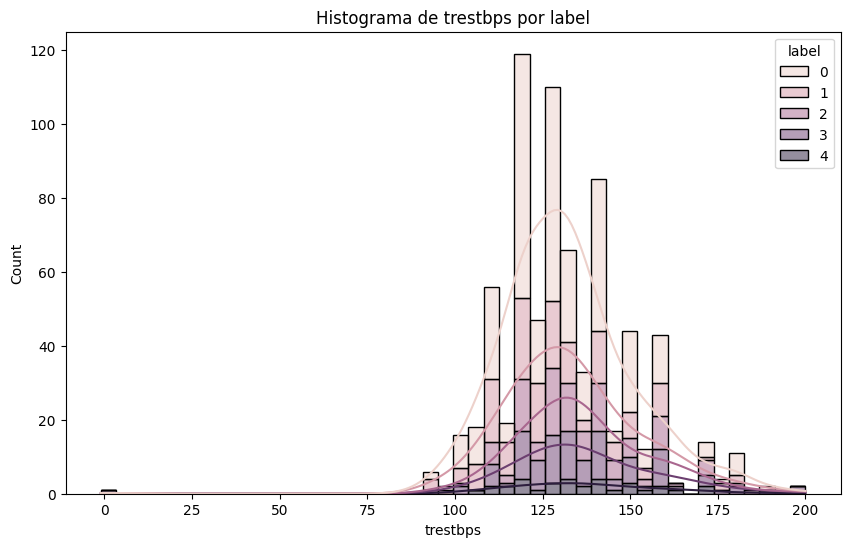

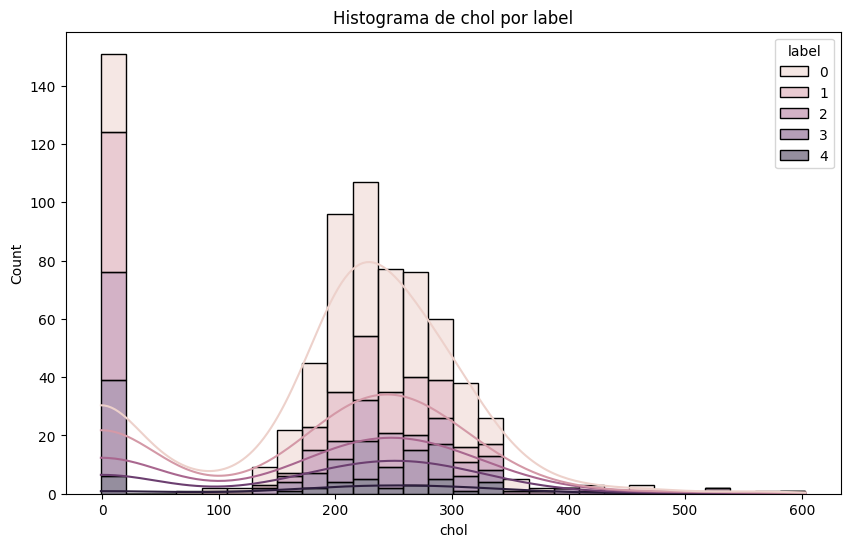

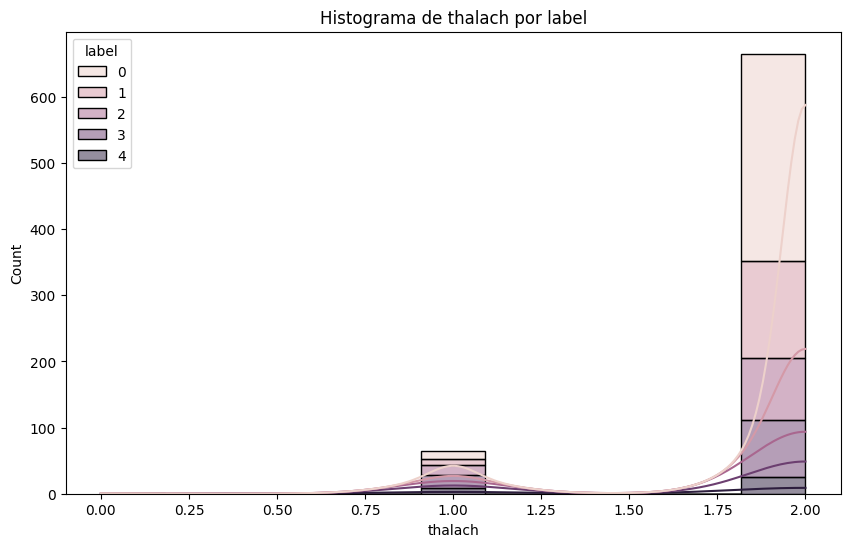

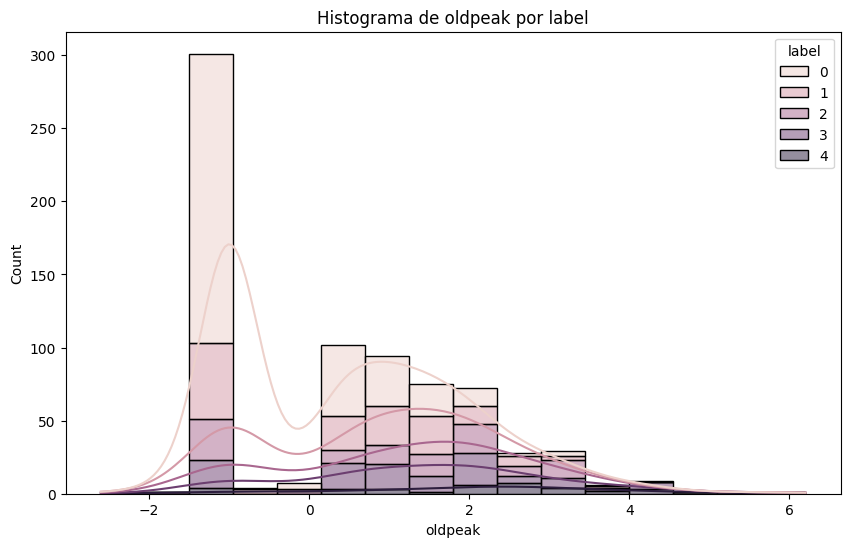

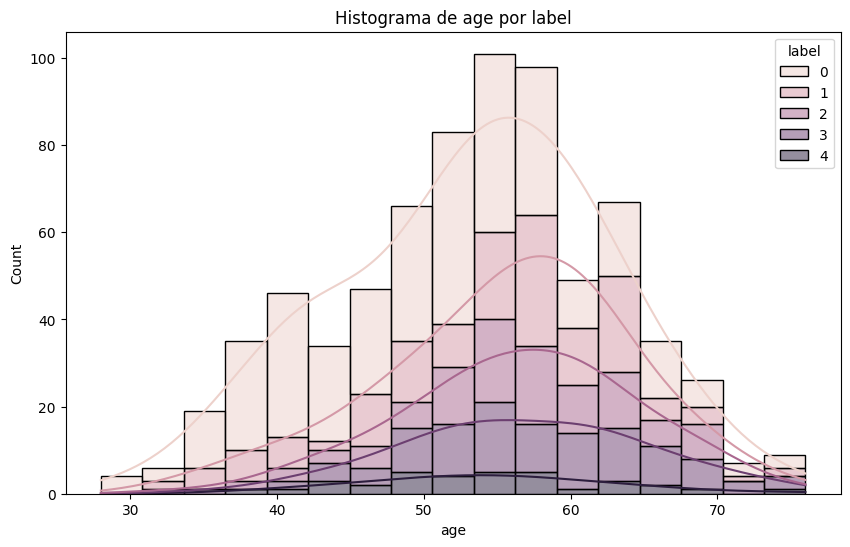

In [15]:
for columna in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=columna, hue='label', kde=True, multiple="stack")
    plt.title(f'Histograma de {columna} por label')
    plt.show()

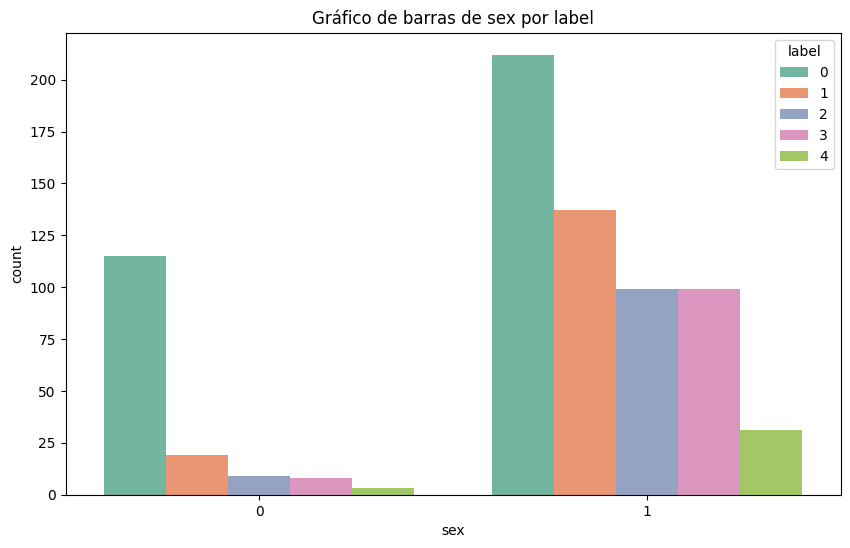

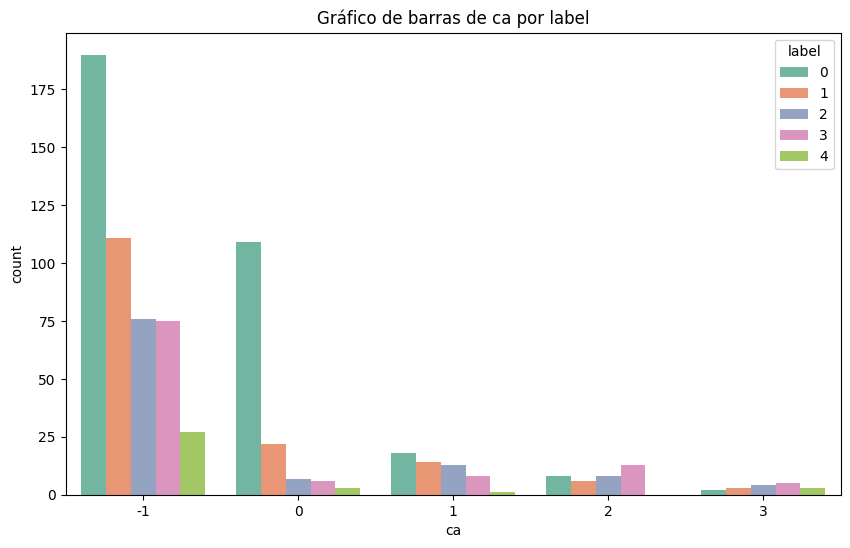

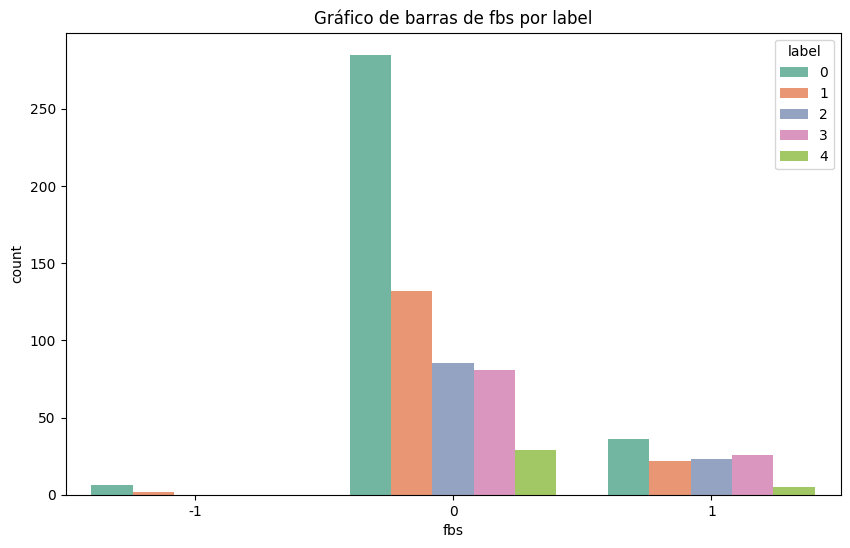

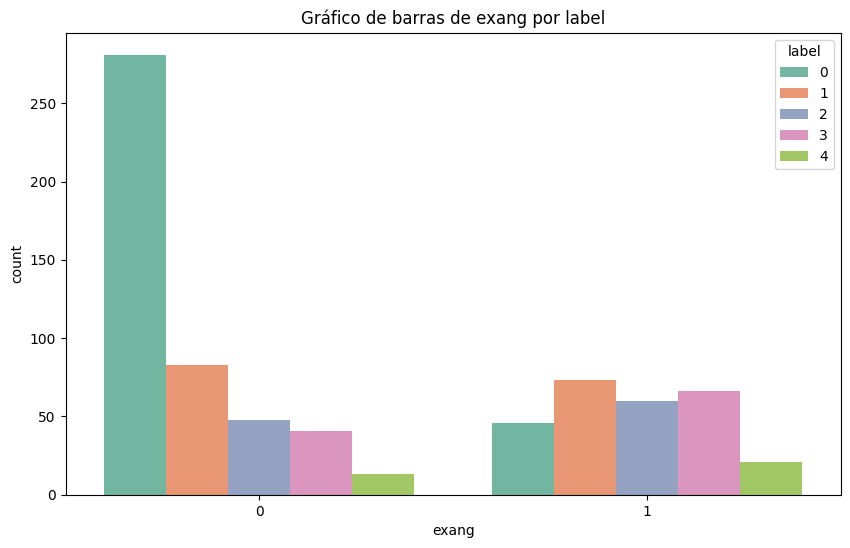

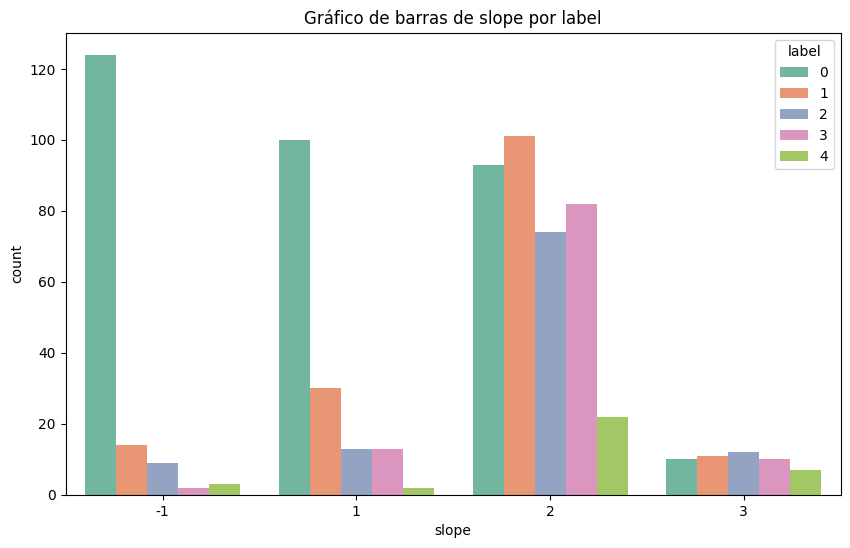

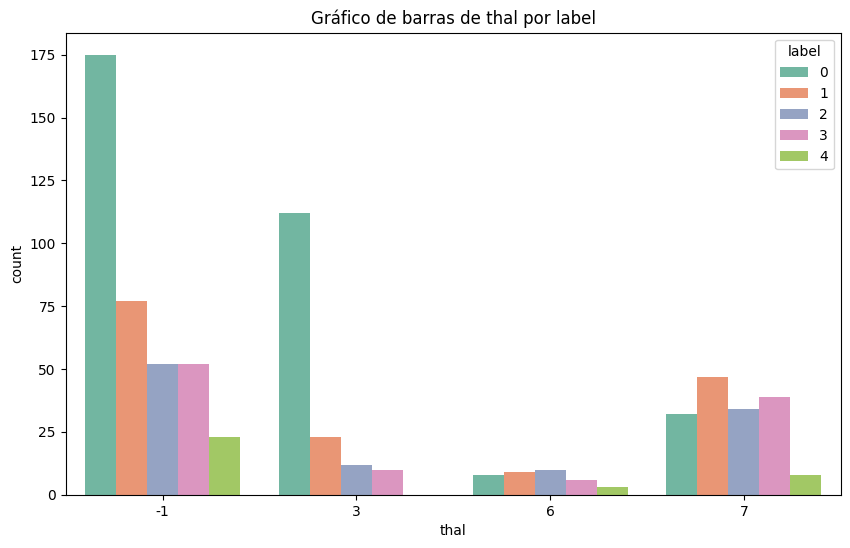

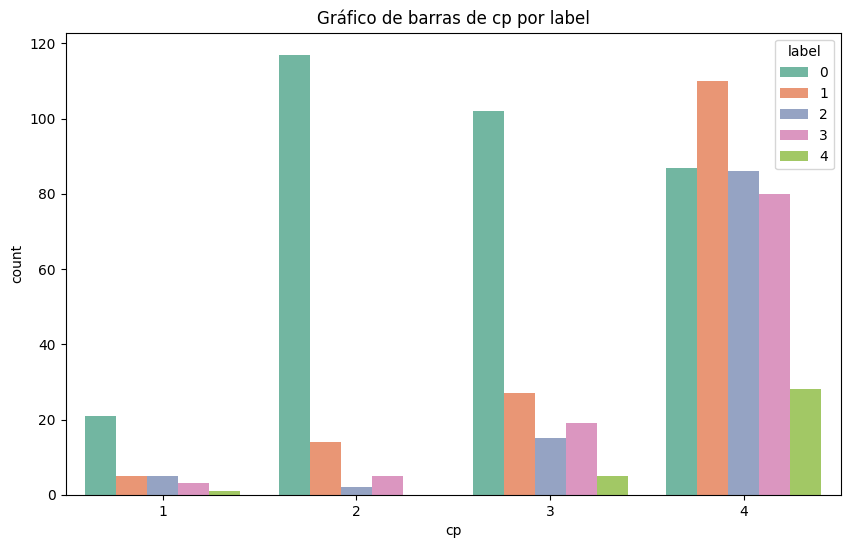

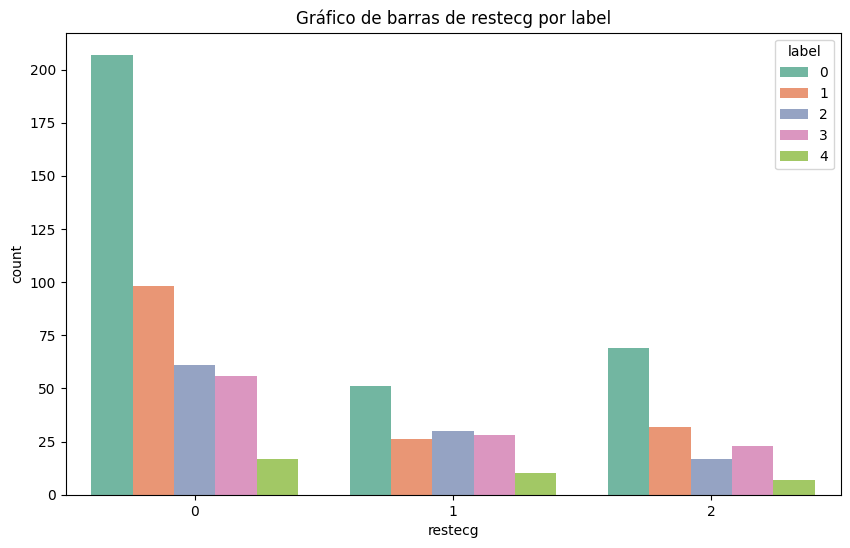

In [16]:
for columna in columns_to_check_categor:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=columna, hue='label', palette='Set2')
    plt.title(f'Gráfico de barras de {columna} por label')
    plt.show()

# **Análisis de Componentes Principales**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


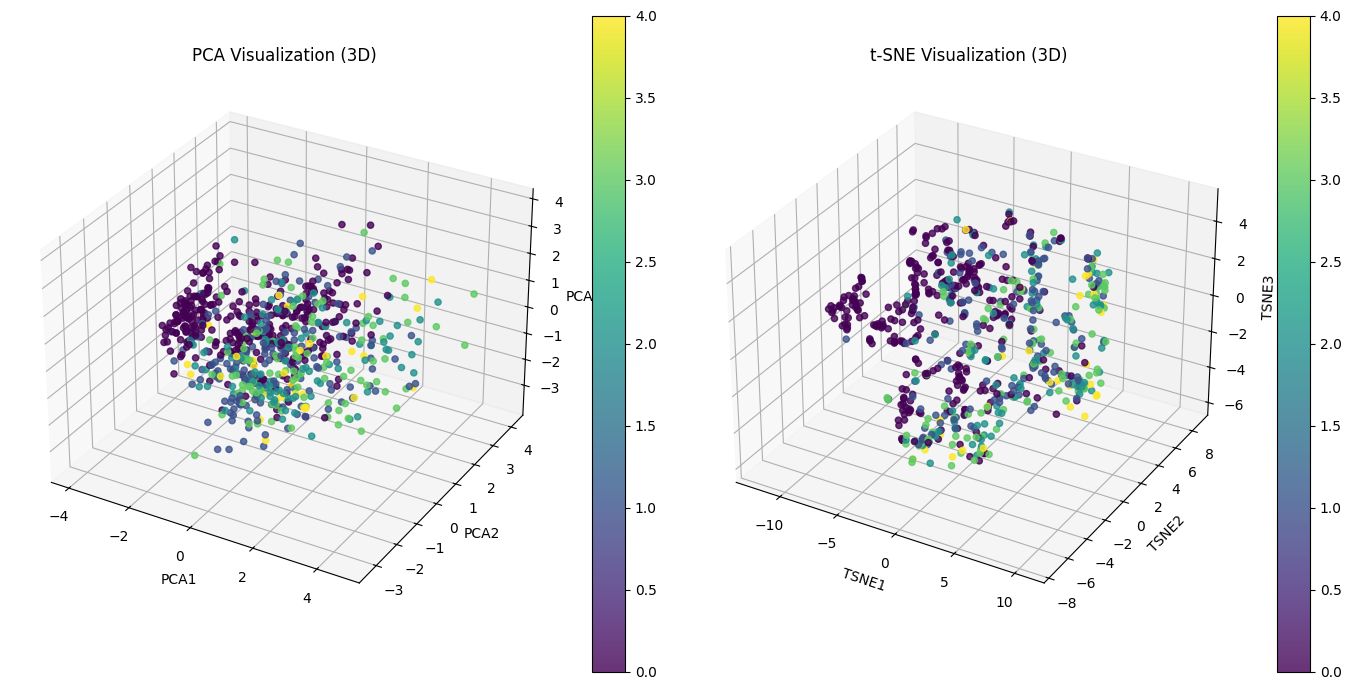

In [24]:

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))


imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

# PCA en 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Crear DataFrames para los resultados
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['label'] = data['label']

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['label'] = data['label']

# Visualización PCA en 3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(
    pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
    c=pca_df['label'], cmap='viridis', alpha=0.8
)
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.colorbar(scatter, ax=ax)

# Visualización t-SNE en 3D
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(
    tsne_df['TSNE1'], tsne_df['TSNE2'], tsne_df['TSNE3'],
    c=tsne_df['label'], cmap='viridis', alpha=0.8
)
ax.set_title('t-SNE Visualization (3D)')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

In [26]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


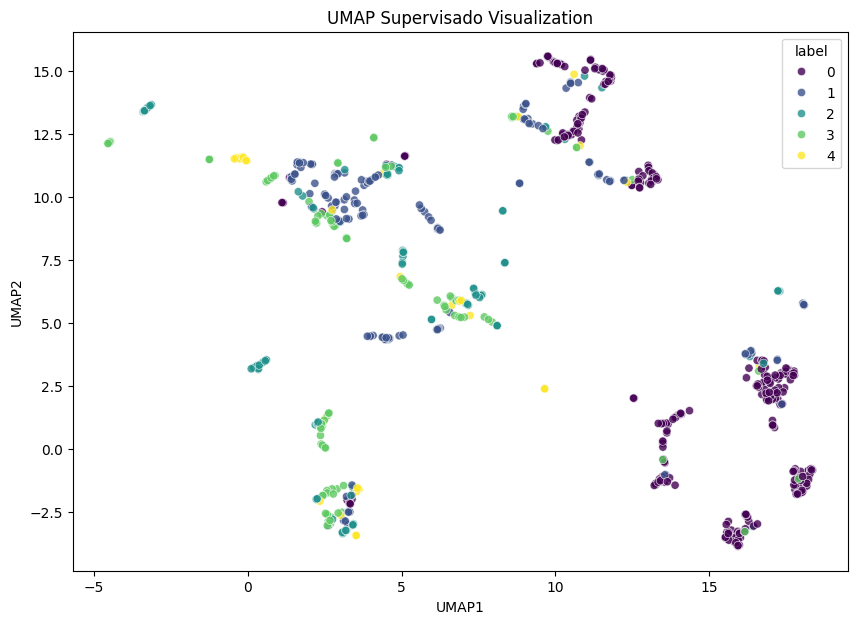

In [29]:


# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['label']))
y = data['label']


X_scaled = np.nan_to_num(X_scaled)
# Configurar UMAP supervisado
umap_reducer = umap.UMAP(n_components=2, random_state=42, metric='euclidean', n_neighbors=9)
X_umap = umap_reducer.fit_transform(X_scaled, y)

# Crear un DataFrame con los resultados de UMAP
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = y

# Visualización de UMAP supervisado
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1',
    y='UMAP2',
    hue='label',
    palette='viridis',
    data=umap_df,
    alpha=0.8
)
plt.title('UMAP Supervisado Visualization')
plt.show()


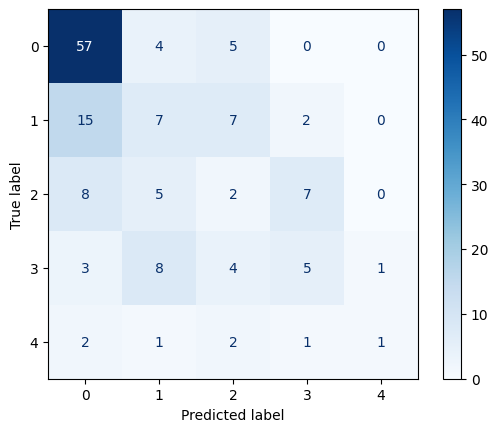

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_cargado)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap="Blues")

# **Entrenamiento del Modelo**

In [17]:
# Definir la variable dependiente (Y) y las variables independientes (X)
X = data.drop(columns=['label'])  # Eliminamos la columna 'label' de las características
y = data['label']  # La columna 'label' es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba con muestreo estratificado

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el conjunto de hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [12],
    'n_estimators' : [50]
}

# Configurar el modelo y la búsqueda por GridSearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=123,
    ),
    param_grid=param_grid,
    cv=10,
    refit=True,
    return_train_score=True,
    n_jobs=-1,
)

# Entrenar el modelo con el conjunto de entrenamiento
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)



Mejores parámetros: {'max_depth': 12, 'n_estimators': 50}


In [18]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [19]:
modelo_gridsearch = grid.best_estimator_

# **Evaluación del Modelo**

In [20]:
# Hacer predicciones con el modelo cargado
y_pred_cargado = modelo_gridsearch.predict(X_test)

# Evaluar el modelo cargado (por ejemplo, F1-score)
f1_cargado = f1_score(y_test, y_pred_cargado, average='weighted')
print(f'F1-score del modelo cargado: {f1_cargado:.2f}')

F1-score del modelo cargado: 0.46


# **Exportar Predicciones a un Archivo CSV**

In [21]:
subirkaggle = modelo_gridsearch.predict(data_test)

In [22]:
# Crear un DataFrame con las predicciones y el índice (ID) de las filas
y_pred_df = pd.DataFrame({
    'ID': range(len(subirkaggle)),  # Índice que comienza desde 0
    'label': subirkaggle  # Predicciones del modelo
})

# Guardar las predicciones en un archivo CSV
y_pred_df.to_csv('predicciones_55.csv', index=False)